<a href="https://colab.research.google.com/github/sf01363/fintech/blob/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EB%93%AC_%ED%8A%B8%EB%A0%88%EC%9D%B4%EB%94%A9_%EA%B3%BC%EC%A0%9C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pykrx

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from pykrx import stock

# KOSPI 이동평균, 골든크로스, 데드크로스

In [ ]:
kospi_df = stock.get_index_ohlcv_by_date('20210520', '20240520', "1001")

In [ ]:
kospi_df.head()

코스피,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
2021-05-20,3174.53,3174.53,3140.48,3162.28,774252245,13719656585417,2215262488943068
2021-05-21,3171.91,3198.01,3149.46,3156.42,797262205,14789457191323,2211878673922714
2021-05-24,3155.91,3163.27,3137.81,3144.30,587968268,11604047358277,2203296528265226
2021-05-25,3152.93,3173.10,3148.30,3171.32,612976970,11728027229513,2222161157628694
2021-05-26,3171.91,3183.97,3160.30,3168.43,1269999045,13173015885449,2220195701874650


In [6]:
# 5일 이동평균선
kospi_df['ma5'] = kospi_df['종가'].rolling(5).mean()

# 20일 이동평균선
kospi_df['ma20'] = kospi_df['종가'].rolling(20).mean()

# 60일 이동평균선
kospi_df['ma60'] = kospi_df['종가'].rolling(60).mean()

# 120일 이동평균선
kospi_df['ma120'] = kospi_df['종가'].rolling(120).mean()

# 240일 이동평균선
kospi_df['ma240'] = kospi_df['종가'].rolling(240).mean()

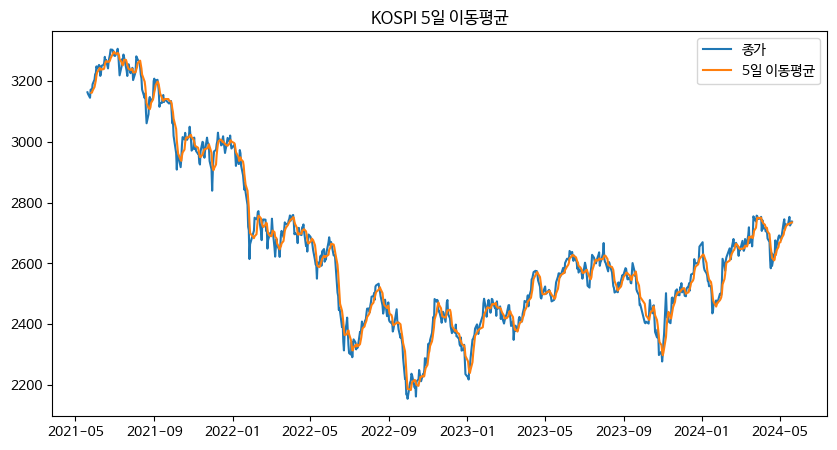

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(kospi_df['종가'], label='종가')
plt.plot(kospi_df['ma5'], label='5일 이동평균')
plt.title('KOSPI 5일 이동평균')
plt.legend()

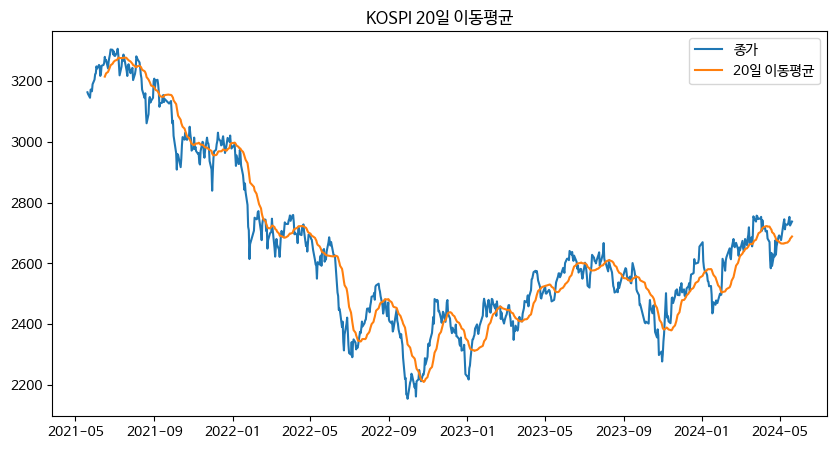

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(kospi_df['종가'], label='종가')
plt.plot(kospi_df['ma20'], label='20일 이동평균')
plt.title('KOSPI 20일 이동평균')
plt.legend()

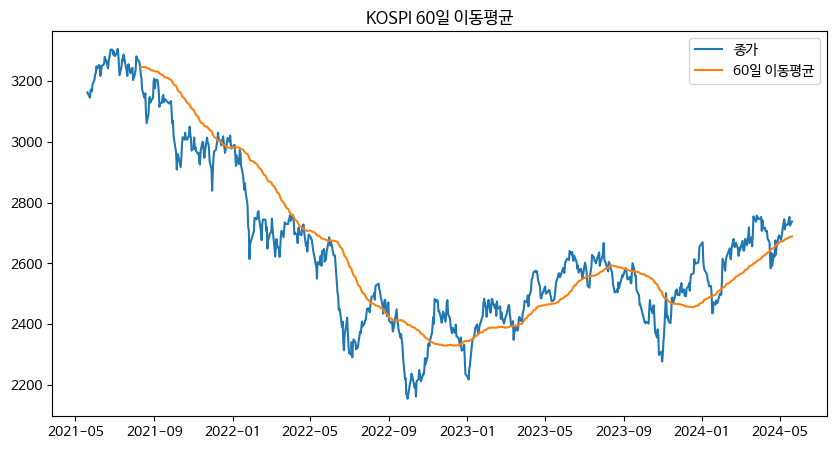

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(kospi_df['종가'], label='종가')
plt.plot(kospi_df['ma60'], label='60일 이동평균')
plt.title('KOSPI 60일 이동평균')
plt.legend()

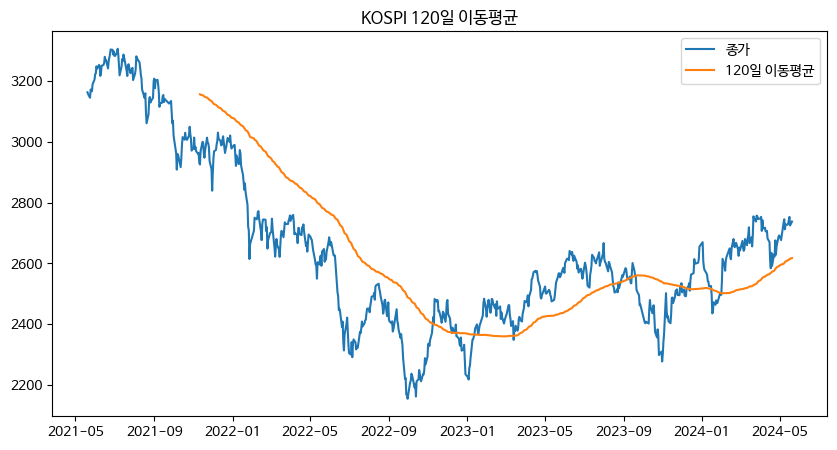

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(kospi_df['종가'], label='종가')
plt.plot(kospi_df['ma120'], label='120일 이동평균')
plt.title('KOSPI 120일 이동평균')
plt.legend()

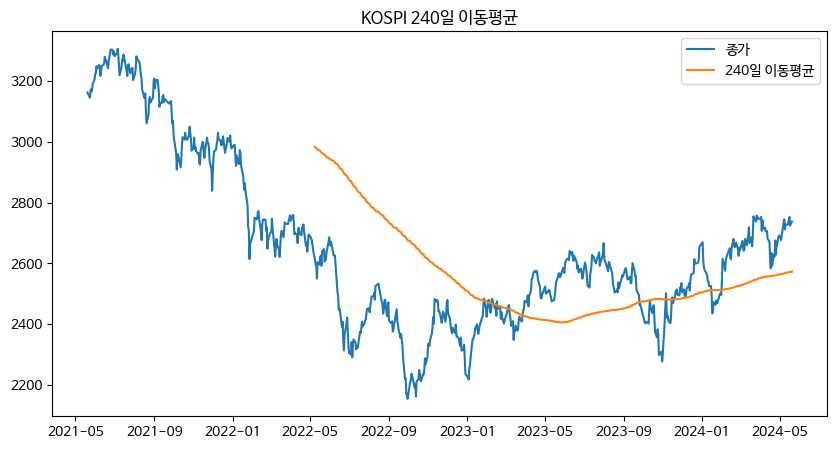

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(kospi_df['종가'], label='종가')
plt.plot(kospi_df['ma240'], label='240일 이동평균')
plt.title('KOSPI 240일 이동평균')
plt.legend()

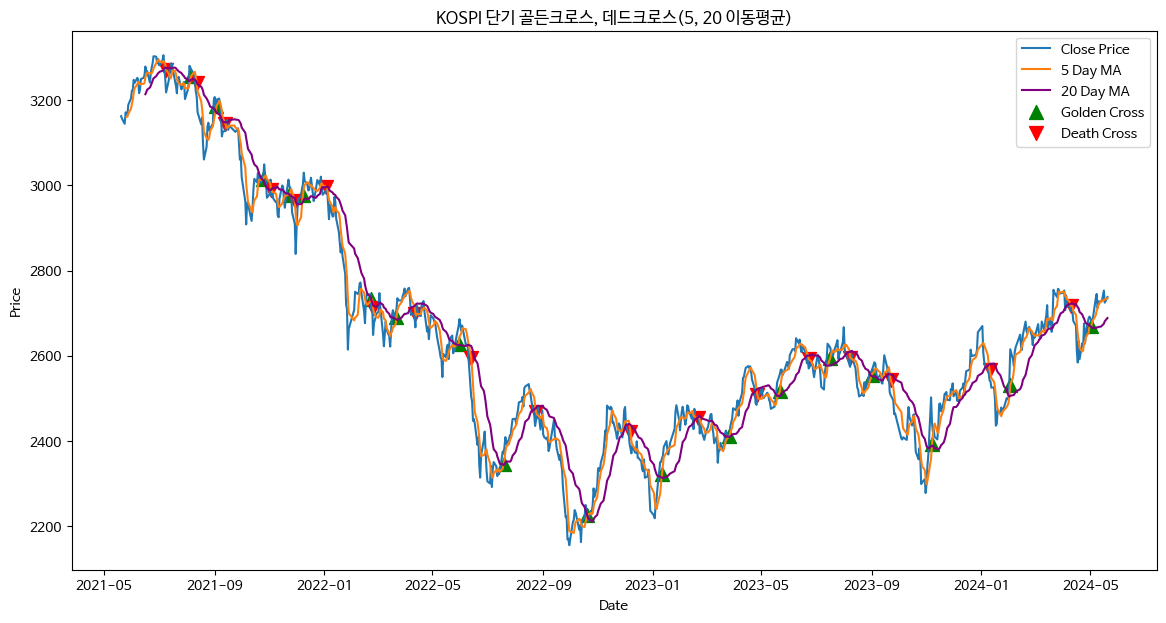

In [31]:
# 골든크로스 포인트 찾기
golden_cross = (kospi_df['ma5'] > kospi_df['ma20']) & (kospi_df['ma5'].shift(1) <= kospi_df['ma20'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kospi_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kospi_df['종가'], label='Close Price')
plt.plot(kospi_df['ma5'], label='5 Day MA')
plt.plot(kospi_df['ma20'], label='20 Day MA', color='purple')
plt.scatter(kospi_df.index[kospi_df['Golden_Cross']], kospi_df['ma5'][kospi_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kospi_df['ma5'] < kospi_df['ma20']) & (kospi_df['ma5'].shift(1) >= kospi_df['ma20'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kospi_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kospi_df.index[kospi_df['Death_Cross']], kospi_df['ma5'][kospi_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('KOSPI 단기 골든크로스, 데드크로스(5, 20 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


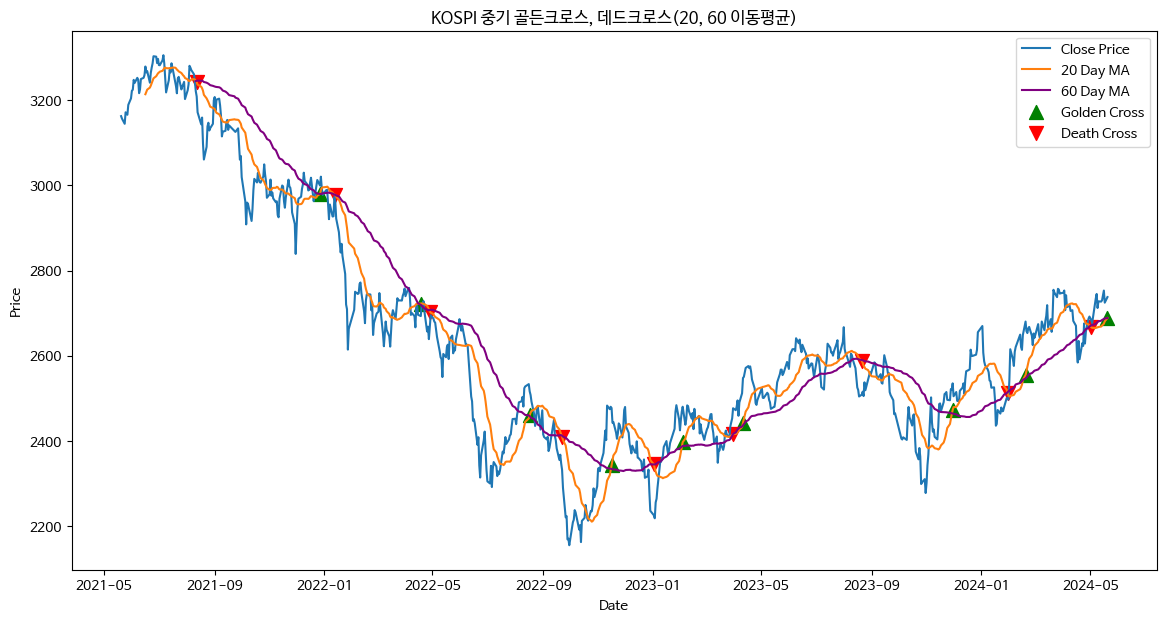

In [29]:
# 골든크로스 포인트 찾기
golden_cross = (kospi_df['ma20'] > kospi_df['ma60']) & (kospi_df['ma20'].shift(1) <= kospi_df['ma60'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kospi_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kospi_df['종가'], label='Close Price')
plt.plot(kospi_df['ma20'], label='20 Day MA')
plt.plot(kospi_df['ma60'], label='60 Day MA', color='purple')
plt.scatter(kospi_df.index[kospi_df['Golden_Cross']], kospi_df['ma20'][kospi_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kospi_df['ma20'] < kospi_df['ma60']) & (kospi_df['ma20'].shift(1) >= kospi_df['ma60'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kospi_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kospi_df.index[kospi_df['Death_Cross']], kospi_df['ma20'][kospi_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('KOSPI 중기 골든크로스, 데드크로스(20, 60 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


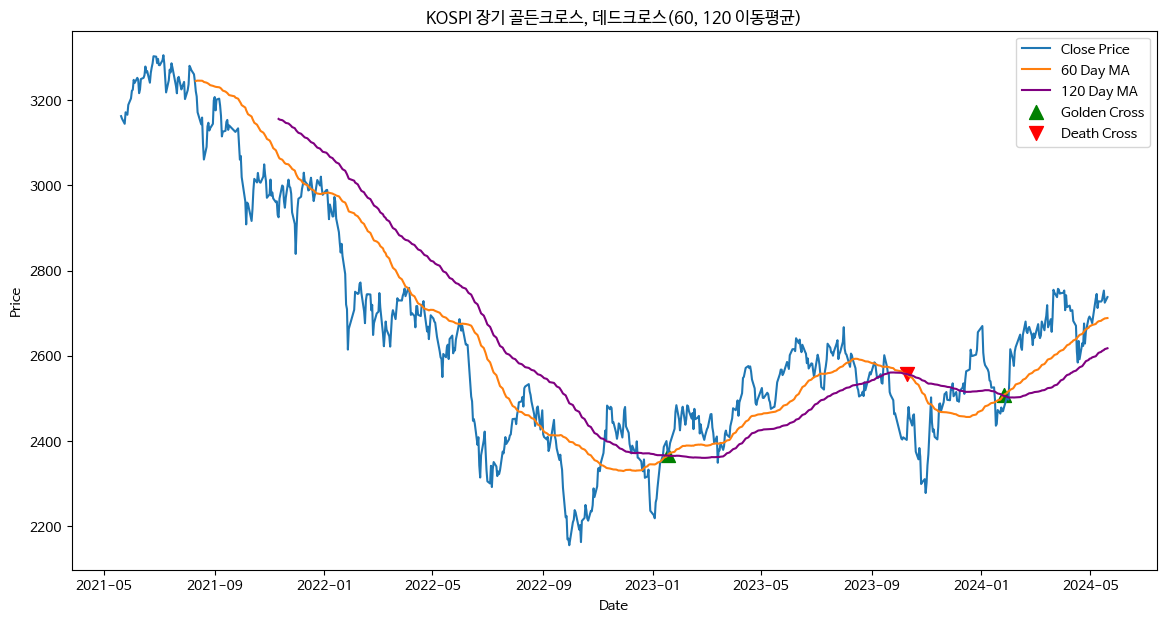

In [30]:
# 골든크로스 포인트 찾기
golden_cross = (kospi_df['ma60'] > kospi_df['ma120']) & (kospi_df['ma60'].shift(1) <= kospi_df['ma120'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kospi_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kospi_df['종가'], label='Close Price')
plt.plot(kospi_df['ma60'], label='60 Day MA')
plt.plot(kospi_df['ma120'], label='120 Day MA', color='purple')
plt.scatter(kospi_df.index[kospi_df['Golden_Cross']], kospi_df['ma60'][kospi_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kospi_df['ma60'] < kospi_df['ma120']) & (kospi_df['ma60'].shift(1) >= kospi_df['ma120'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kospi_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kospi_df.index[kospi_df['Death_Cross']], kospi_df['ma60'][kospi_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('KOSPI 장기 골든크로스, 데드크로스(60, 120 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


# 현대자동차 이동평균, 골든크로스, 데드크로스

In [33]:
kospi_df = stock.get_market_ohlcv_by_date('20210520', '20240520', "005380")

In [34]:
kospi_df.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2021-05-20,228500,230500,224000,224500,1190072,-2.813853
2021-05-21,227000,233000,225500,227500,1333704,1.336303
2021-05-24,227500,231000,226000,228000,765657,0.219780
2021-05-25,230000,230000,225000,227500,781950,-0.219298
2021-05-26,227500,229000,222500,223500,1088210,-1.758242


In [35]:
# 5일 이동평균선
kospi_df['ma5'] = kospi_df['종가'].rolling(5).mean()

# 20일 이동평균선
kospi_df['ma20'] = kospi_df['종가'].rolling(20).mean()

# 60일 이동평균선
kospi_df['ma60'] = kospi_df['종가'].rolling(60).mean()

# 120일 이동평균선
kospi_df['ma120'] = kospi_df['종가'].rolling(120).mean()

# 240일 이동평균선
kospi_df['ma240'] = kospi_df['종가'].rolling(240).mean()

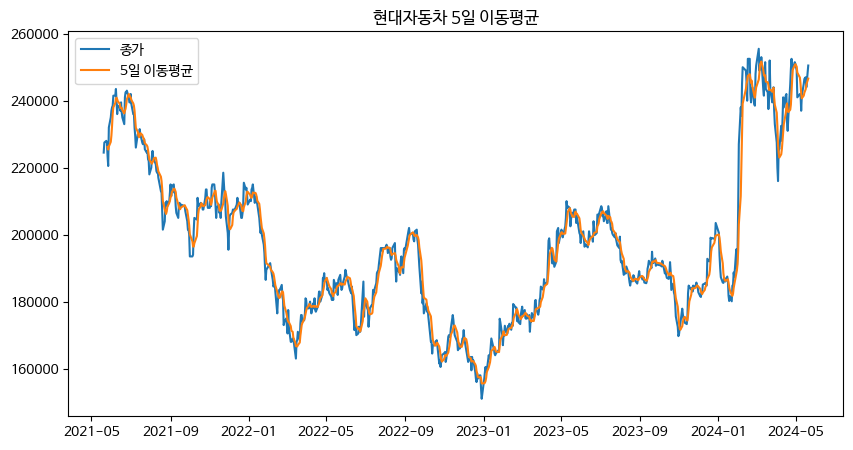

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(kospi_df['종가'], label='종가')
plt.plot(kospi_df['ma5'], label='5일 이동평균')
plt.title('현대자동차 5일 이동평균')
plt.legend()

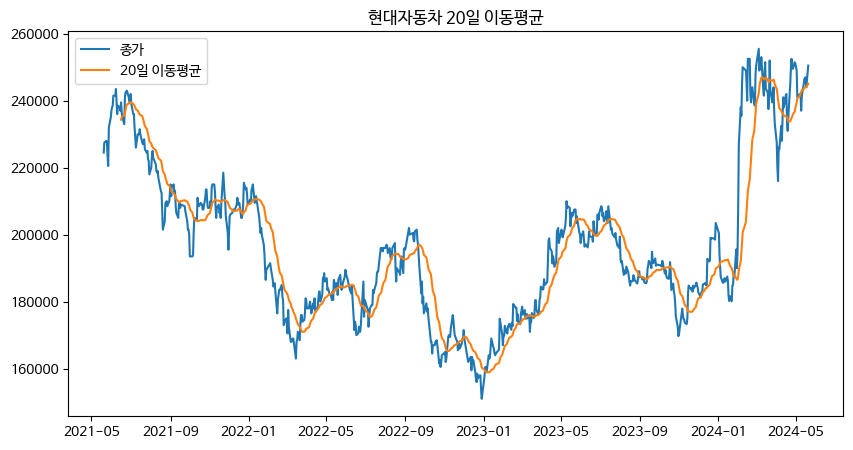

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(kospi_df['종가'], label='종가')
plt.plot(kospi_df['ma20'], label='20일 이동평균')
plt.title('현대자동차 20일 이동평균')
plt.legend()

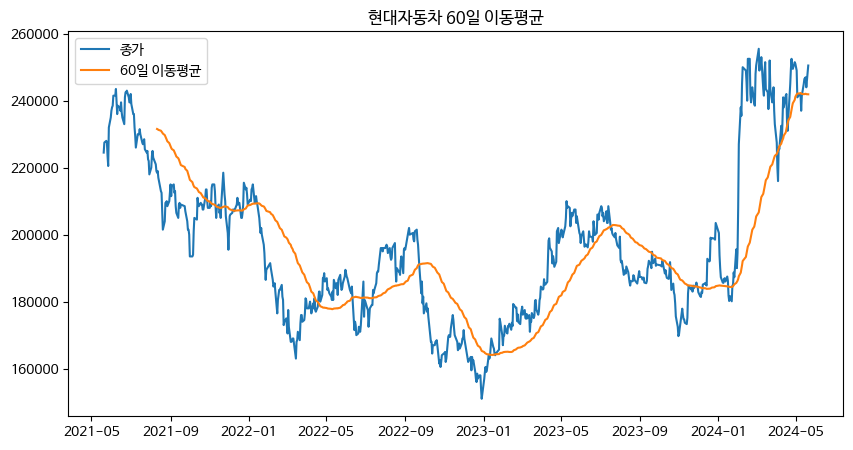

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(kospi_df['종가'], label='종가')
plt.plot(kospi_df['ma60'], label='60일 이동평균')
plt.title('현대자동차 60일 이동평균')
plt.legend()

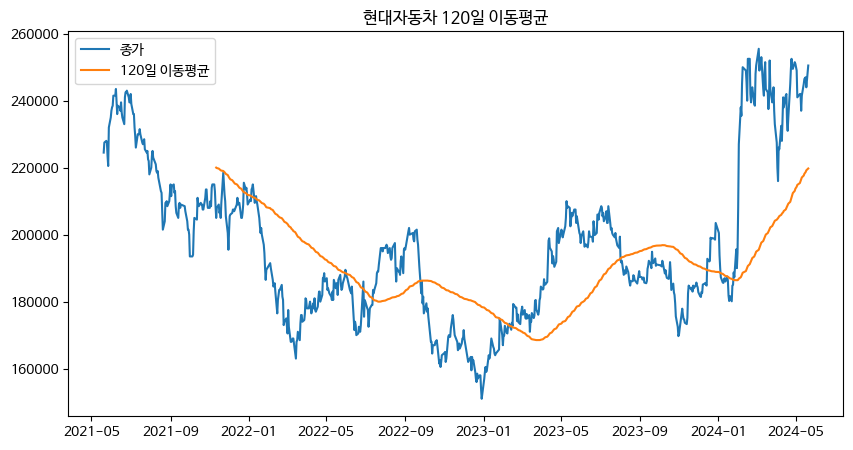

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(kospi_df['종가'], label='종가')
plt.plot(kospi_df['ma120'], label='120일 이동평균')
plt.title('현대자동차 120일 이동평균')
plt.legend()

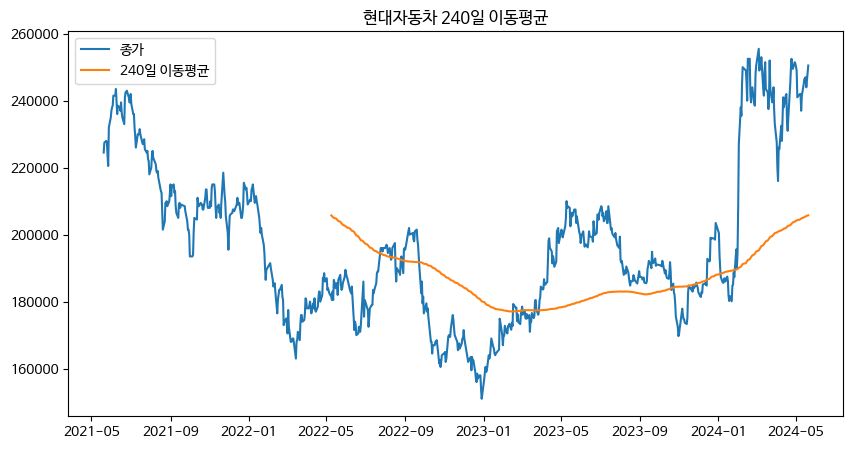

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(kospi_df['종가'], label='종가')
plt.plot(kospi_df['ma240'], label='240일 이동평균')
plt.title('현대자동차 240일 이동평균')
plt.legend()

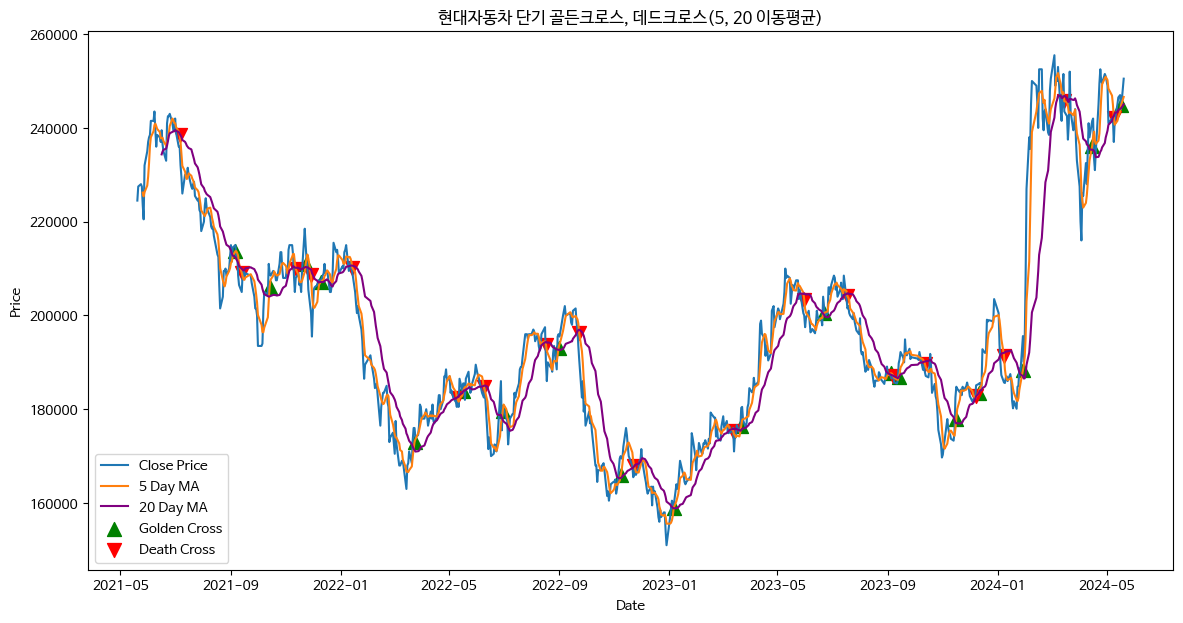

In [49]:
# 골든크로스 포인트 찾기
golden_cross = (kospi_df['ma5'] > kospi_df['ma20']) & (kospi_df['ma5'].shift(1) <= kospi_df['ma20'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kospi_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kospi_df['종가'], label='Close Price')
plt.plot(kospi_df['ma5'], label='5 Day MA')
plt.plot(kospi_df['ma20'], label='20 Day MA', color='purple')
plt.scatter(kospi_df.index[kospi_df['Golden_Cross']], kospi_df['ma5'][kospi_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kospi_df['ma5'] < kospi_df['ma20']) & (kospi_df['ma5'].shift(1) >= kospi_df['ma20'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kospi_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kospi_df.index[kospi_df['Death_Cross']], kospi_df['ma5'][kospi_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('현대자동차 단기 골든크로스, 데드크로스(5, 20 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


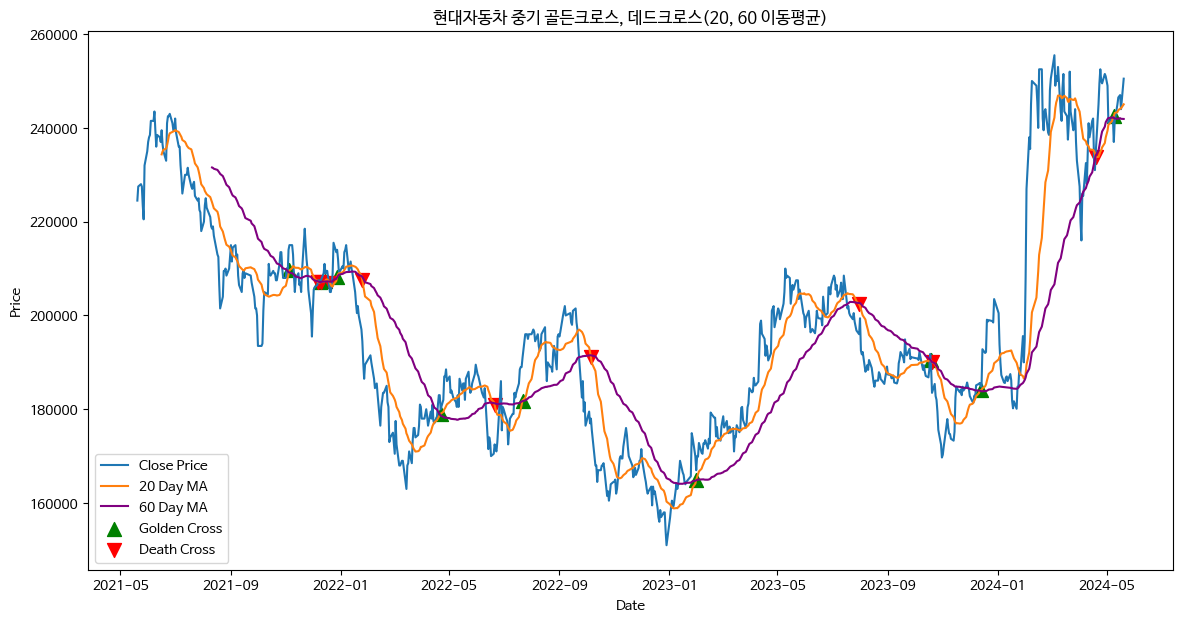

In [50]:
# 골든크로스 포인트 찾기
golden_cross = (kospi_df['ma20'] > kospi_df['ma60']) & (kospi_df['ma20'].shift(1) <= kospi_df['ma60'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kospi_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kospi_df['종가'], label='Close Price')
plt.plot(kospi_df['ma20'], label='20 Day MA')
plt.plot(kospi_df['ma60'], label='60 Day MA', color='purple')
plt.scatter(kospi_df.index[kospi_df['Golden_Cross']], kospi_df['ma20'][kospi_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kospi_df['ma20'] < kospi_df['ma60']) & (kospi_df['ma20'].shift(1) >= kospi_df['ma60'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kospi_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kospi_df.index[kospi_df['Death_Cross']], kospi_df['ma20'][kospi_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('현대자동차 중기 골든크로스, 데드크로스(20, 60 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


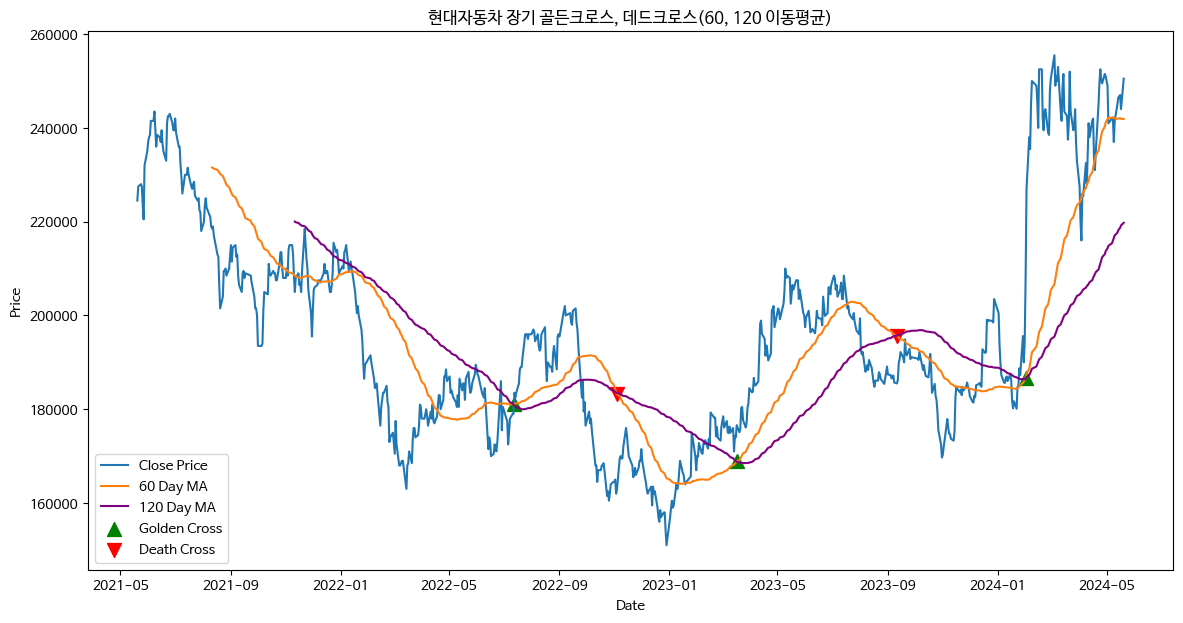

In [51]:
# 골든크로스 포인트 찾기
golden_cross = (kospi_df['ma60'] > kospi_df['ma120']) & (kospi_df['ma60'].shift(1) <= kospi_df['ma120'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kospi_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kospi_df['종가'], label='Close Price')
plt.plot(kospi_df['ma60'], label='60 Day MA')
plt.plot(kospi_df['ma120'], label='120 Day MA', color='purple')
plt.scatter(kospi_df.index[kospi_df['Golden_Cross']], kospi_df['ma60'][kospi_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kospi_df['ma60'] < kospi_df['ma120']) & (kospi_df['ma60'].shift(1) >= kospi_df['ma120'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kospi_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kospi_df.index[kospi_df['Death_Cross']], kospi_df['ma60'][kospi_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('현대자동차 장기 골든크로스, 데드크로스(60, 120 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


# KOSDAQ 이동평균, 골든크로스, 데드크로스

In [75]:
kodaq_df = stock.get_market_ohlcv_by_date('20210520', '20240520', 'kosdaq')

In [76]:
kodaq_df.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2021-05-20,96835,97162,96278,97113,1531653,0.209473
2021-05-21,97230,97937,96555,96563,1533585,-0.566351
2021-05-24,96523,96523,94837,94837,1540416,-1.787434
2021-05-25,94978,96340,94978,96207,1681868,1.444584
2021-05-26,96269,96749,96269,96606,1939819,0.414731


In [77]:
# 5일 이동평균선
kodaq_df['ma5'] = kodaq_df['종가'].rolling(5).mean()

# 20일 이동평균선
kodaq_df['ma20'] = kodaq_df['종가'].rolling(20).mean()

# 60일 이동평균선
kodaq_df['ma60'] = kodaq_df['종가'].rolling(60).mean()

# 120일 이동평균선
kodaq_df['ma120'] = kodaq_df['종가'].rolling(120).mean()

# 240일 이동평균선
kodaq_df['ma240'] = kodaq_df['종가'].rolling(240).mean()

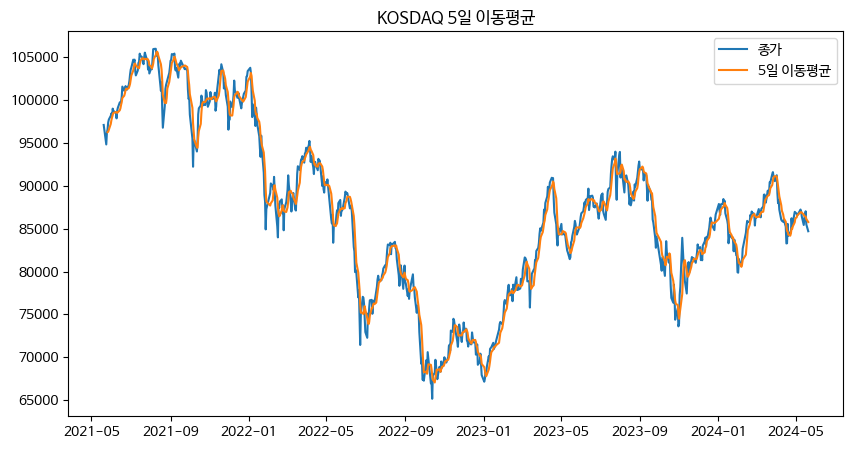

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(kodaq_df['종가'], label='종가')
plt.plot(kodaq_df['ma5'], label='5일 이동평균')
plt.title('KOSDAQ 5일 이동평균')
plt.legend()

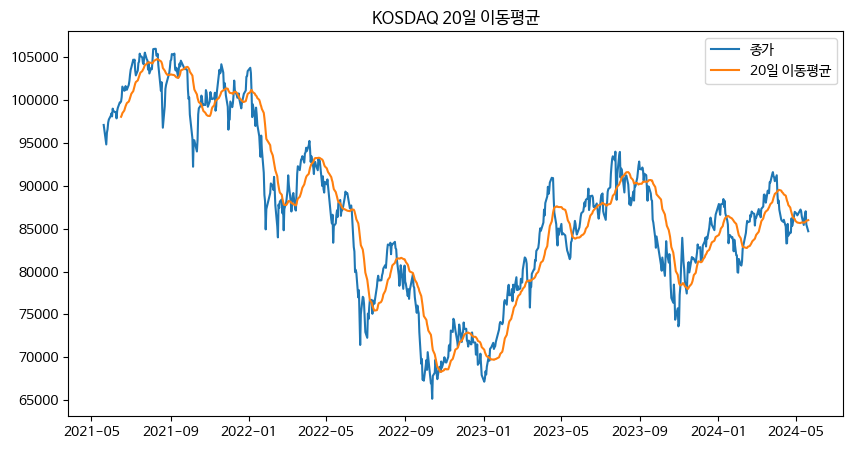

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(kodaq_df['종가'], label='종가')
plt.plot(kodaq_df['ma20'], label='20일 이동평균')
plt.title('KOSDAQ 20일 이동평균')
plt.legend()

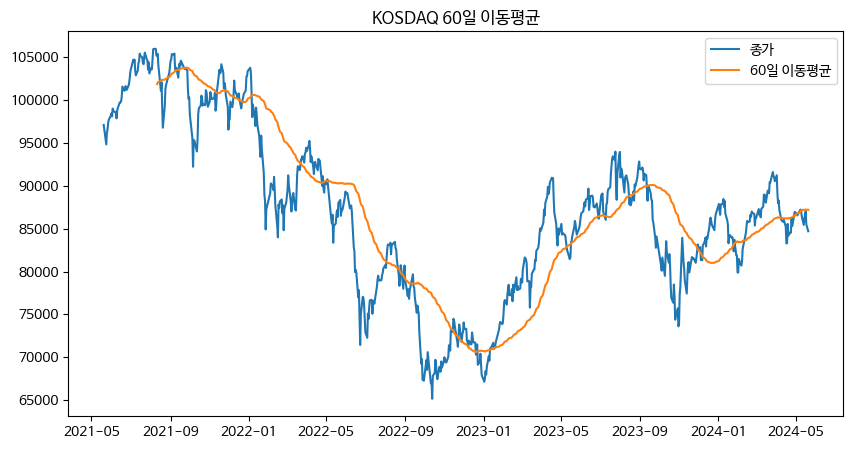

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(kodaq_df['종가'], label='종가')
plt.plot(kodaq_df['ma60'], label='60일 이동평균')
plt.title('KOSDAQ 60일 이동평균')
plt.legend()

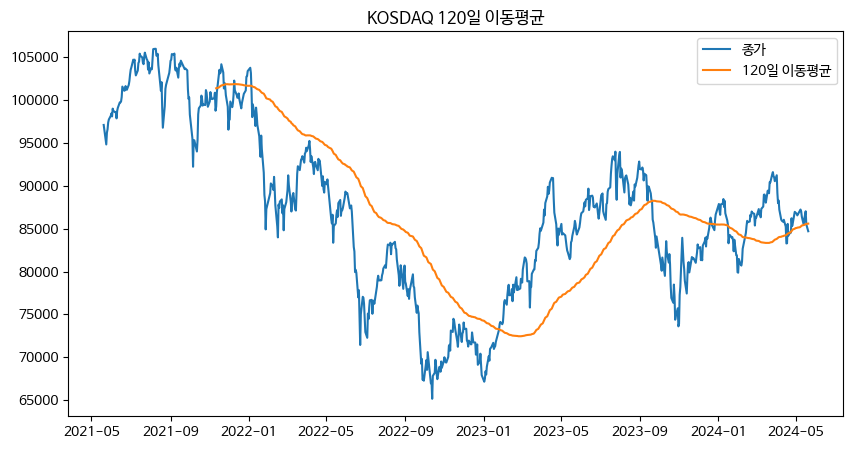

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(kodaq_df['종가'], label='종가')
plt.plot(kodaq_df['ma120'], label='120일 이동평균')
plt.title('KOSDAQ 120일 이동평균')
plt.legend()

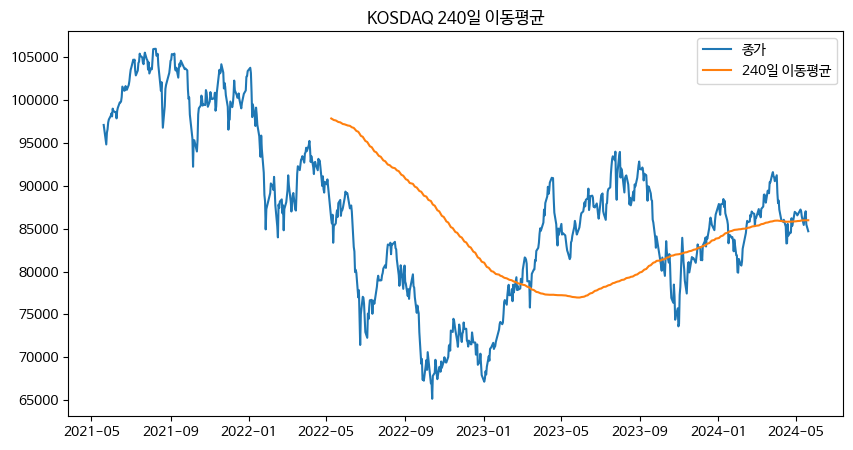

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(kodaq_df['종가'], label='종가')
plt.plot(kodaq_df['ma240'], label='240일 이동평균')
plt.title('KOSDAQ 240일 이동평균')
plt.legend()

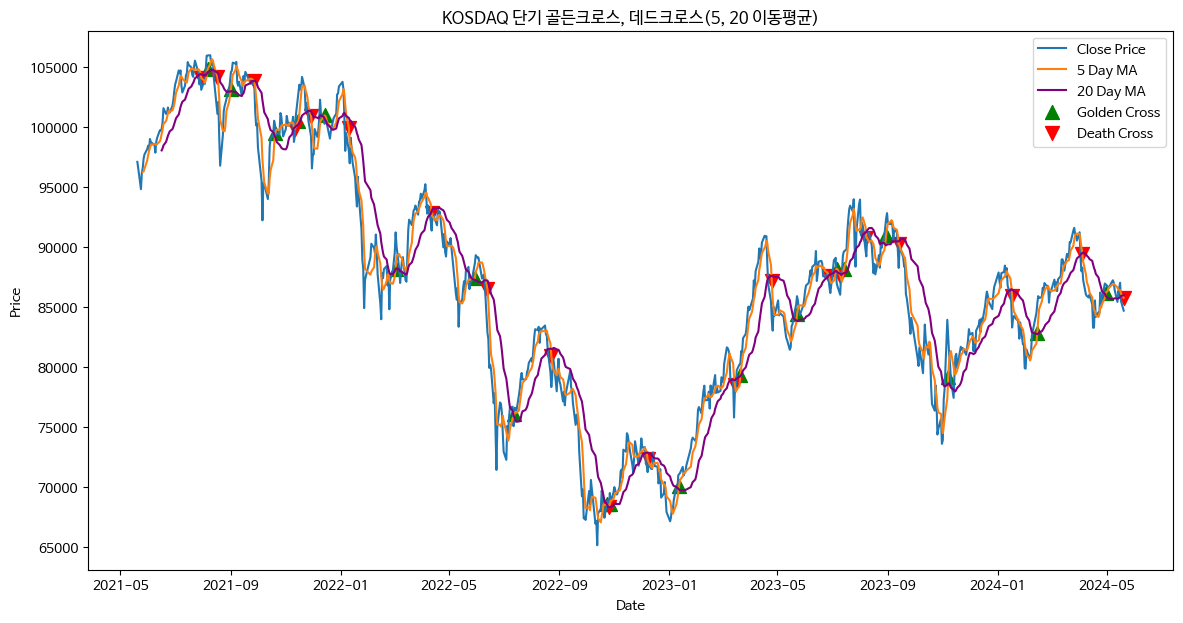

In [69]:
# 골든크로스 포인트 찾기
golden_cross = (kodaq_df['ma5'] > kodaq_df['ma20']) & (kodaq_df['ma5'].shift(1) <= kodaq_df['ma20'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kodaq_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kodaq_df['종가'], label='Close Price')
plt.plot(kodaq_df['ma5'], label='5 Day MA')
plt.plot(kodaq_df['ma20'], label='20 Day MA', color='purple')
plt.scatter(kodaq_df.index[kodaq_df['Golden_Cross']], kodaq_df['ma5'][kodaq_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kodaq_df['ma5'] < kodaq_df['ma20']) & (kodaq_df['ma5'].shift(1) >= kodaq_df['ma20'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kodaq_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kodaq_df.index[kodaq_df['Death_Cross']], kodaq_df['ma5'][kodaq_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('KOSDAQ 단기 골든크로스, 데드크로스(5, 20 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


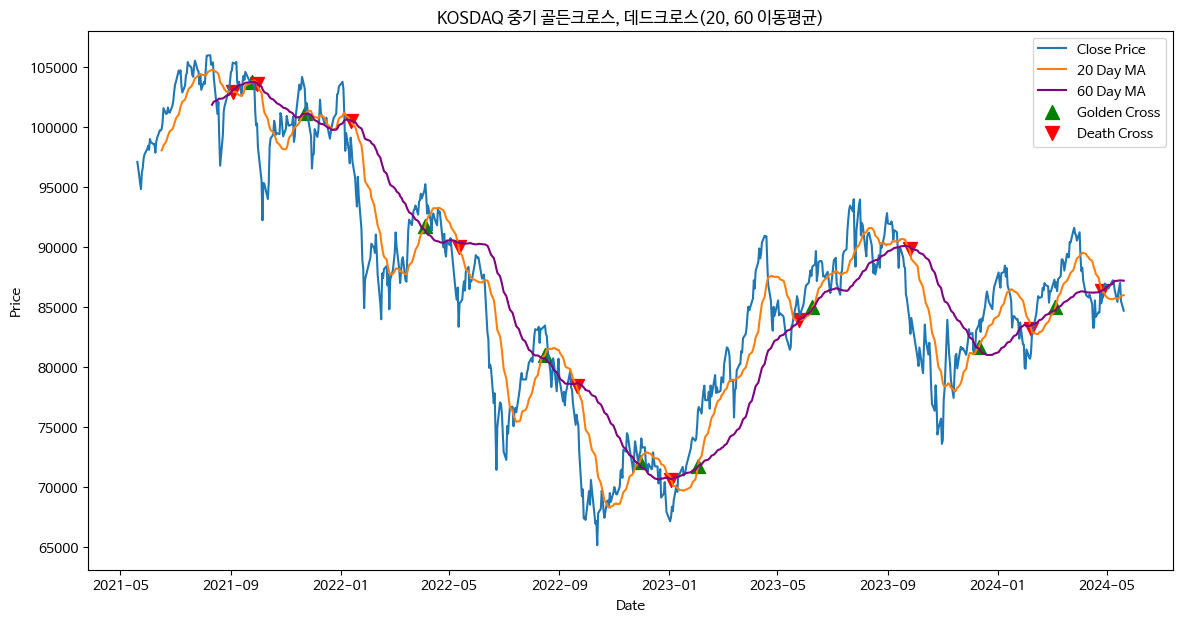

In [70]:
# 골든크로스 포인트 찾기
golden_cross = (kodaq_df['ma20'] > kodaq_df['ma60']) & (kodaq_df['ma20'].shift(1) <= kodaq_df['ma60'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kodaq_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kodaq_df['종가'], label='Close Price')
plt.plot(kodaq_df['ma20'], label='20 Day MA')
plt.plot(kodaq_df['ma60'], label='60 Day MA', color='purple')
plt.scatter(kodaq_df.index[kodaq_df['Golden_Cross']], kodaq_df['ma20'][kodaq_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kodaq_df['ma20'] < kodaq_df['ma60']) & (kodaq_df['ma20'].shift(1) >= kodaq_df['ma60'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kodaq_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kodaq_df.index[kodaq_df['Death_Cross']], kodaq_df['ma20'][kodaq_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('KOSDAQ 중기 골든크로스, 데드크로스(20, 60 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


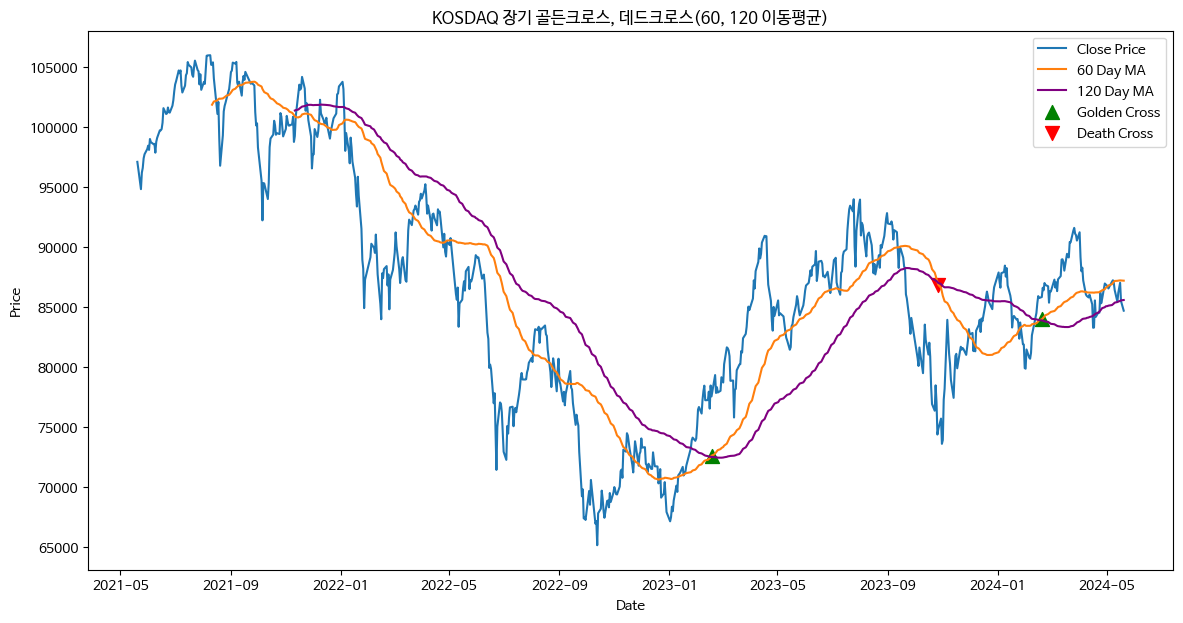

In [71]:
# 골든크로스 포인트 찾기
golden_cross = (kodaq_df['ma60'] > kodaq_df['ma120']) & (kodaq_df['ma60'].shift(1) <= kodaq_df['ma120'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kodaq_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kodaq_df['종가'], label='Close Price')
plt.plot(kodaq_df['ma60'], label='60 Day MA')
plt.plot(kodaq_df['ma120'], label='120 Day MA', color='purple')
plt.scatter(kodaq_df.index[kodaq_df['Golden_Cross']], kodaq_df['ma60'][kodaq_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kodaq_df['ma60'] < kodaq_df['ma120']) & (kodaq_df['ma60'].shift(1) >= kodaq_df['ma120'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kodaq_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kodaq_df.index[kodaq_df['Death_Cross']], kodaq_df['ma60'][kodaq_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('KOSDAQ 장기 골든크로스, 데드크로스(60, 120 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


# CJ ENM 이동평균, 골든크로스, 데드크로스

In [79]:
kodaq_df = stock.get_market_ohlcv_by_date('20210520', '20240520', '035760')

In [80]:
kodaq_df.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2021-05-20,151800,153000,150000,153000,112001,0.790514
2021-05-21,153600,154500,150700,151400,120382,-1.045752
2021-05-24,151400,152500,148700,149600,78533,-1.188904
2021-05-25,150300,154000,150000,153600,155422,2.673797
2021-05-26,154000,160900,153600,160100,490036,4.231771


In [81]:
# 5일 이동평균선
kodaq_df['ma5'] = kodaq_df['종가'].rolling(5).mean()

# 20일 이동평균선
kodaq_df['ma20'] = kodaq_df['종가'].rolling(20).mean()

# 60일 이동평균선
kodaq_df['ma60'] = kodaq_df['종가'].rolling(60).mean()

# 120일 이동평균선
kodaq_df['ma120'] = kodaq_df['종가'].rolling(120).mean()

# 240일 이동평균선
kodaq_df['ma240'] = kodaq_df['종가'].rolling(240).mean()

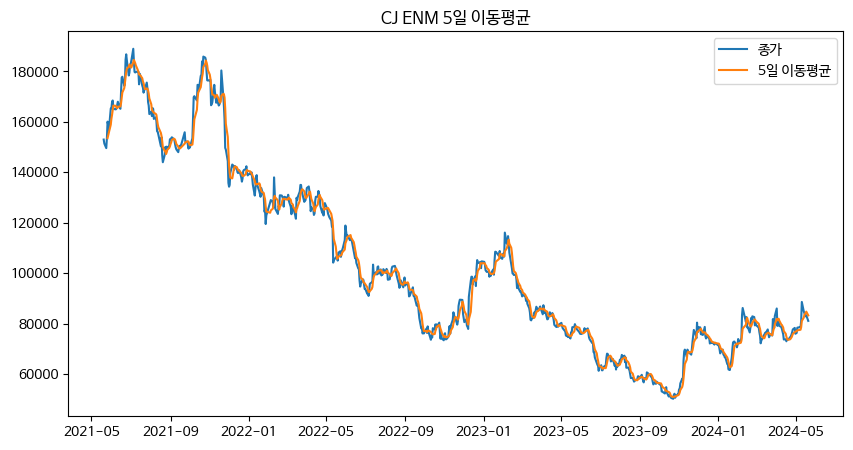

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(kodaq_df['종가'], label='종가')
plt.plot(kodaq_df['ma5'], label='5일 이동평균')
plt.title('CJ ENM 5일 이동평균')
plt.legend()

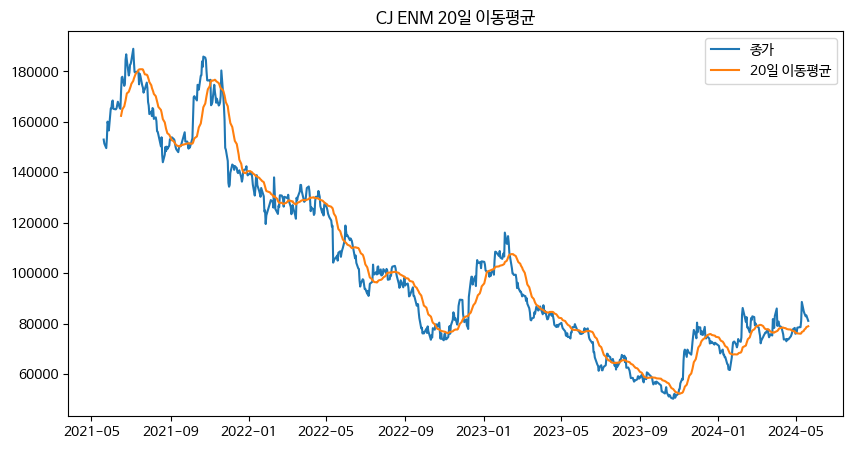

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(kodaq_df['종가'], label='종가')
plt.plot(kodaq_df['ma20'], label='20일 이동평균')
plt.title('CJ ENM 20일 이동평균')
plt.legend()

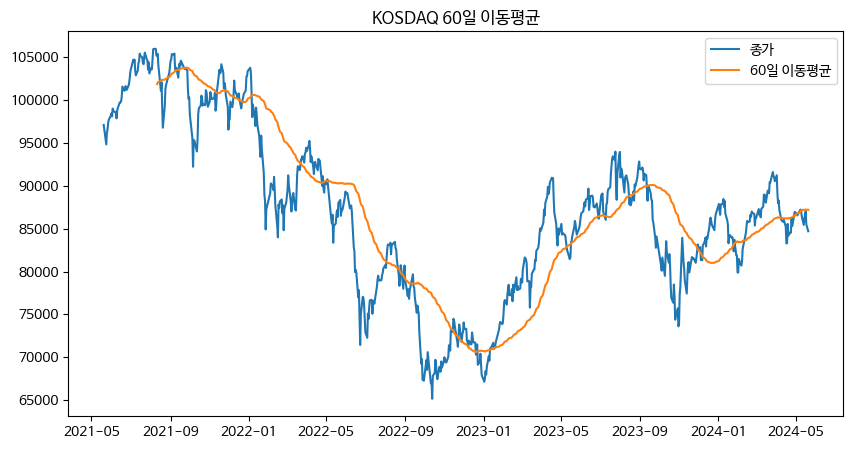

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(kodaq_df['종가'], label='종가')
plt.plot(kodaq_df['ma60'], label='60일 이동평균')
plt.title('KOSDAQ 60일 이동평균')
plt.legend()

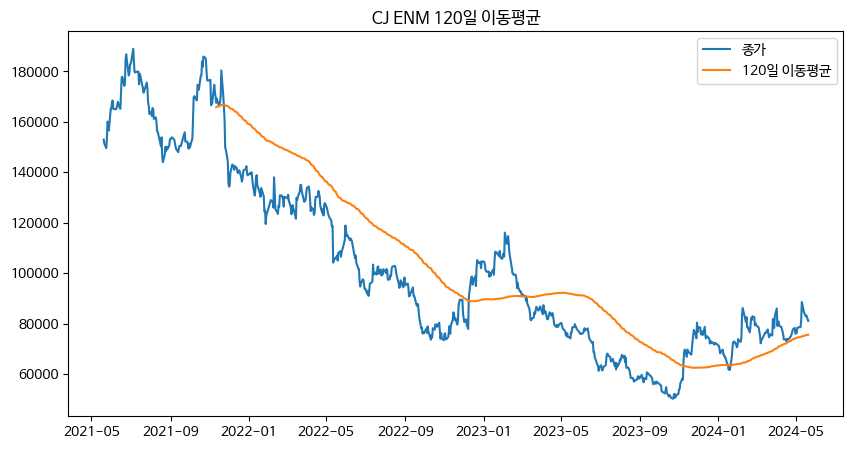

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(kodaq_df['종가'], label='종가')
plt.plot(kodaq_df['ma120'], label='120일 이동평균')
plt.title('CJ ENM 120일 이동평균')
plt.legend()

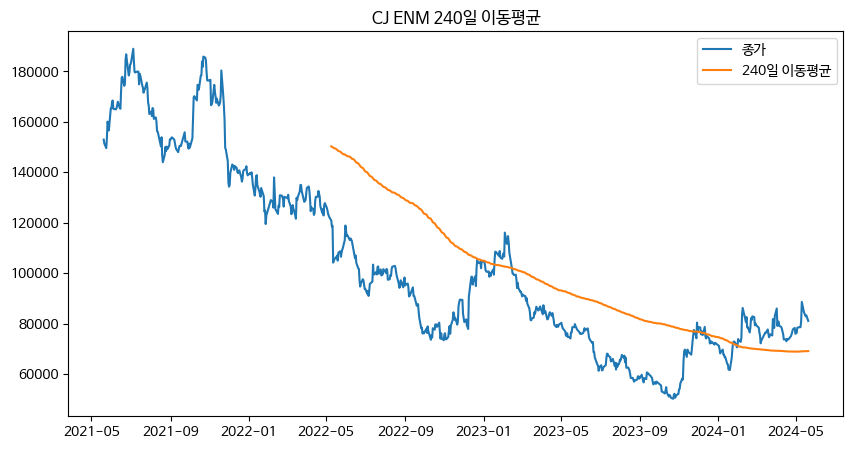

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(kodaq_df['종가'], label='종가')
plt.plot(kodaq_df['ma240'], label='240일 이동평균')
plt.title('CJ ENM 240일 이동평균')
plt.legend()

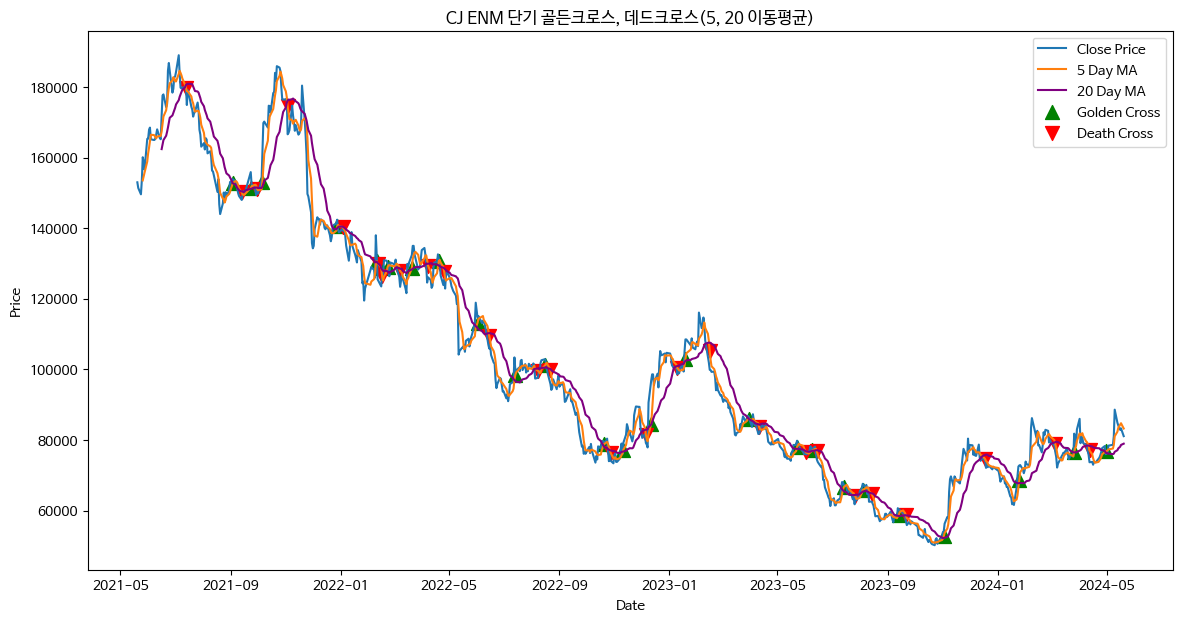

In [86]:
# 골든크로스 포인트 찾기
golden_cross = (kodaq_df['ma5'] > kodaq_df['ma20']) & (kodaq_df['ma5'].shift(1) <= kodaq_df['ma20'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kodaq_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kodaq_df['종가'], label='Close Price')
plt.plot(kodaq_df['ma5'], label='5 Day MA')
plt.plot(kodaq_df['ma20'], label='20 Day MA', color='purple')
plt.scatter(kodaq_df.index[kodaq_df['Golden_Cross']], kodaq_df['ma5'][kodaq_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kodaq_df['ma5'] < kodaq_df['ma20']) & (kodaq_df['ma5'].shift(1) >= kodaq_df['ma20'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kodaq_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kodaq_df.index[kodaq_df['Death_Cross']], kodaq_df['ma5'][kodaq_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('CJ ENM 단기 골든크로스, 데드크로스(5, 20 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


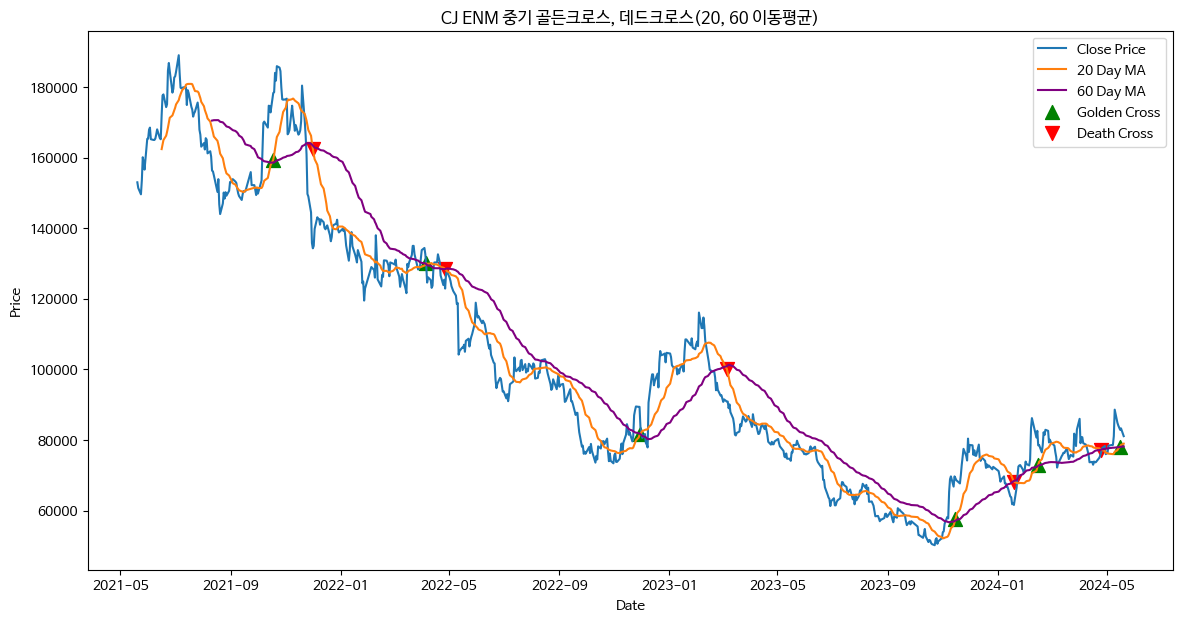

In [87]:
# 골든크로스 포인트 찾기
golden_cross = (kodaq_df['ma20'] > kodaq_df['ma60']) & (kodaq_df['ma20'].shift(1) <= kodaq_df['ma60'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kodaq_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kodaq_df['종가'], label='Close Price')
plt.plot(kodaq_df['ma20'], label='20 Day MA')
plt.plot(kodaq_df['ma60'], label='60 Day MA', color='purple')
plt.scatter(kodaq_df.index[kodaq_df['Golden_Cross']], kodaq_df['ma20'][kodaq_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kodaq_df['ma20'] < kodaq_df['ma60']) & (kodaq_df['ma20'].shift(1) >= kodaq_df['ma60'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kodaq_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kodaq_df.index[kodaq_df['Death_Cross']], kodaq_df['ma20'][kodaq_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('CJ ENM 중기 골든크로스, 데드크로스(20, 60 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


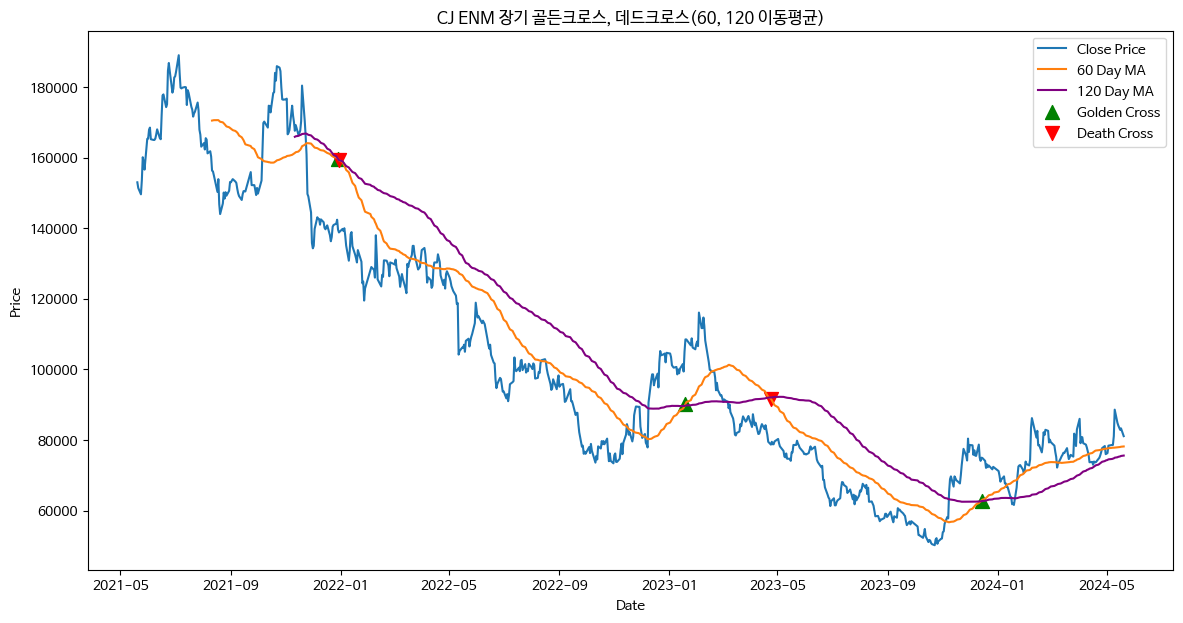

In [88]:
# 골든크로스 포인트 찾기
golden_cross = (kodaq_df['ma60'] > kodaq_df['ma120']) & (kodaq_df['ma60'].shift(1) <= kodaq_df['ma120'].shift(1))

# 데이터프레임에 골든크로스 컬럼 추가
kodaq_df['Golden_Cross'] = golden_cross

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(kodaq_df['종가'], label='Close Price')
plt.plot(kodaq_df['ma60'], label='60 Day MA')
plt.plot(kodaq_df['ma120'], label='120 Day MA', color='purple')
plt.scatter(kodaq_df.index[kodaq_df['Golden_Cross']], kodaq_df['ma60'][kodaq_df['Golden_Cross']], label='Golden Cross', marker='^', color='g', s=100)

# 데드크로스 포인트 찾기
death_cross = (kodaq_df['ma60'] < kodaq_df['ma120']) & (kodaq_df['ma60'].shift(1) >= kodaq_df['ma120'].shift(1))

# 데이터프레임에 데드크로스 컬럼 추가
kodaq_df['Death_Cross'] = death_cross

# 마커 사이즈 키우기 (s 파라미터 사용)
plt.scatter(kodaq_df.index[kodaq_df['Death_Cross']], kodaq_df['ma60'][kodaq_df['Death_Cross']], label='Death Cross', marker='v', color='r', s=100)

plt.title('CJ ENM 장기 골든크로스, 데드크로스(60, 120 이동평균)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
